In [3]:
from datetime import date, datetime, timedelta
# import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.output import *
from covid19model.data.sciensano import get_sciensano_COVID19_data_spatial, get_sciensano_COVID19_data
from covid19model.data.mobility import get_google_mobility_data

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# df_hosp, df_mort, df_cases, df_vacc = get_sciensano_COVID19_data(update=False)
df_hosp

H_tot  ICU_tot  H_in  H_out
date       NIS                               
2020-03-15 10000     50        9     7      4
           20001     13        2     2      0
           20002      5        2     1      0
           21000     58       11     7      2
           30000     19        3     6      2
...                 ...      ...   ...    ...
2022-01-26 50000    574       46    44     68
           60000    457       43    49     59
           70000    173       20    26     26
           80000     45       11     7      8
           90000    165       16    14      8

[7513 rows x 4 columns]

In [29]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr', values='hospitalised_IN', moving_avg=True).sum(axis=1)
sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index

# Google Mobility Data per activity

**Insert Google Mobility parameters per province**

In [30]:
NIS = 60000

google_df = get_google_mobility_data(update=False, provincial=True)
# google_df_dates = google_df.index.values
# google_df.columns

google_df = google_df.reset_index().set_index('date')
google_df = google_df[google_df['NIS']==NIS].drop(columns=['NIS', 'parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

# google_df.plot()

**Insert Google Mobility parameters nationally**

In [31]:
google_df = get_google_mobility_data(update=False, provincial=False)
google_df = google_df.drop(columns=['parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

google_df

,g_home,g_school,g_work,g_transport,g_leisure,g_other
date,,,,,,
2020-02-15,1,0,1.01,1.09,1.03,1.02
2020-02-16,1,0,0.97,0.97,0.93,0.97
2020-02-17,1,0,1.04,1.04,1.01,1.02
2020-02-18,1,0,1.04,1.06,1.03,1.03
2020-02-19,1,0,1.04,1.05,1.03,1.01
...,...,...,...,...,...,...
2022-01-13,1,0,0.78,0.71,0.87,1.15
2022-01-14,1,0,0.79,0.74,0.86,1.16
2022-01-15,1,0,1.04,0.80,0.89,1.10


In [32]:
google_df.loc[google_df.index>=pd.Timestamp(2020, 2, 15),'g_school'] = 1 # t0-t1
google_df.loc[google_df.index>=pd.Timestamp(2020, 3, 15),'g_school'] = 0 # t1-t2
google_df.loc[google_df.index>=pd.Timestamp(2020, 5, 15),'g_school'] = 1 # t2-t3
google_df.loc[google_df.index>=pd.Timestamp(2020, 7, 1), 'g_school'] = 0 # t3-t4
google_df.loc[google_df.index>=pd.Timestamp(2020, 8, 3), 'g_school'] = 0 # t4-t5
google_df.loc[google_df.index>=pd.Timestamp(2020, 8, 24),'g_school'] = 0 # t5-t6
google_df.loc[google_df.index>=pd.Timestamp(2020, 9, 1), 'g_school'] = 0.7 # t6-t7
google_df.loc[google_df.index>=pd.Timestamp(2020, 9, 21),'g_school'] = 1 # t7-t8
google_df.loc[google_df.index>=pd.Timestamp(2020, 10,19),'g_school'] = 1 # t8-t9
google_df.loc[google_df.index>=pd.Timestamp(2020, 11, 2),'g_school'] = 0 # t9-t10
google_df.loc[google_df.index>=pd.Timestamp(2020, 11,16),'g_school'] = 1 # t10-t11
google_df.loc[google_df.index>=pd.Timestamp(2020, 12,18),'g_school'] = 0 # t11-t12
google_df.loc[google_df.index>=pd.Timestamp(2021, 1, 4), 'g_school'] = 1 # t12-t13
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 15),'g_school'] = 0 # t13-t14
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 21),'g_school'] = 1 # t14-t15
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 28),'g_school'] = 1 # t15-t16
google_df.loc[google_df.index>=pd.Timestamp(2021, 3, 26),'g_school'] = 0 # t16-t17
google_df.loc[google_df.index>=pd.Timestamp(2021, 4, 18),'g_school'] = 1 # t17-t18
google_df.loc[google_df.index>=pd.Timestamp(2021, 6, 1), 'g_school'] = 1 # t18-t19
google_df.loc[google_df.index>=pd.Timestamp(2021, 7, 1), 'g_school'] = 0 # t19-t20
google_df.loc[google_df.index>=pd.Timestamp(2021, 9, 1), 'g_school'] = 0.7 # t20-t21
google_df.loc[google_df.index>=pd.Timestamp(2021, 9, 21),'g_school'] = 1 # t21-t22
google_df.loc[google_df.index>=pd.Timestamp(2021, 10, 1),'g_school'] = 1 # t22-t23
google_df.loc[google_df.index>=pd.Timestamp(2021, 11, 1),'g_school'] = 0 # t23-t24
google_df.loc[google_df.index>=pd.Timestamp(2021, 11, 7),'g_school'] = 1 # t24-t25
google_df.loc[google_df.index>=pd.Timestamp(2021, 12,21),'g_school'] = 0 # t25-t26

<IPython.core.display.Javascript object>


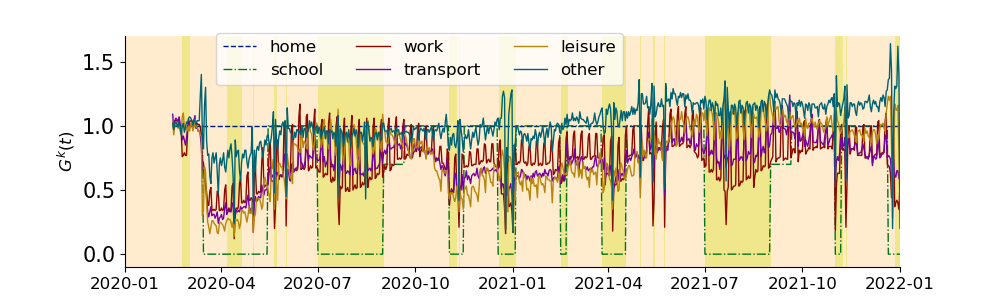

In [42]:
from covid19model.visualization.utils import moving_avg
from covid19model.visualization.output import *
from covid19model.data import sciensano

# df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)
sciensano_df_public = moving_avg(df_hosp[['H_in']].groupby('date').sum(), dropna=True)
sciensano_values_public = sciensano_df_public.values
sciensano_dates_public = sciensano_df_public.index + pd.Timedelta(hours=12)

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.7
ax.set_ylim(-0.1, ylim)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df.index, google_df.values[:,0:1], linewidth=1, linestyle='--')
ax.plot(google_df.index, google_df.values[:,1:2], linewidth=1, linestyle='-.')
ax.plot(google_df.index, google_df.values[:,2:], linewidth=1, linestyle='-')#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
# google_df.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$G^{k}(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

ax.legend(['home', 'school', 'work', 'transport', 'leisure', 'other'], loc='center', ncol=3,  bbox_to_anchor=(0.38, 0.9), fontsize=ticklabelsize)
# plt.savefig("GCM_resulting_timeseries.png", bbox_inches='tight', dpi=400)

# Effectivity parameters time series

In [7]:
plt.style.use('seaborn-dark-palette')

linewidth=1
# colors = dict({'retail_recreation' : 'cornflowerblue',
#                'grocery' : 'firebrick',
#                'parks' : 'slategray',
#                'transport' : 'deeppink',
#                'work' : 'darkmagenta',
#                'residential' : 'darkturquoise'})
for loc in google_df.columns:
    if loc=='retail_recreation':
        ax.plot(google_df_dates, google_df[loc], linewidth=linewidth, label='retail & recreation') #  color=colors[loc],
    else:
        ax.plot(google_df_dates, google_df[loc], linewidth=linewidth, label=loc) #  color=colors[loc],
ax.legend(fontsize = ticklabelsize-2, loc='upper right', bbox_to_anchor=(0.27, 1))
ax.set_ylabel('mobility % to baseline', size=ticklabelsize)

plt.axhline(0, linestyle='--', linewidth=1, color='k', alpha=0.4)

plt.setp(ax.get_xticklabels(), Fontsize=ticklabelsize)
plt.setp(ax.get_yticklabels(), Fontsize=ticklabelsize)

# plt.savefig('google-mobility-data.png', dpi=400, bbox_inches='tight')

NameError: name 'google_df_dates' is not defined

# Social intertia

<IPython.core.display.Javascript object>


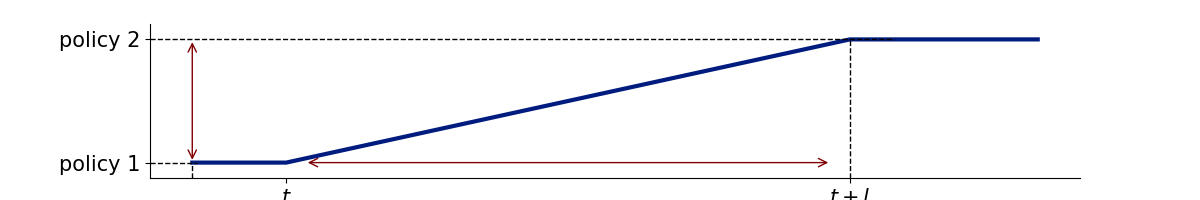

In [106]:
days = np.array([i for i in range(0, 10)])
policy = np.zeros(len(days))

t0 = 1
l = 7
policy_1 = 0.1
policy_2 = 0.9

for t in days:
    if t < t0:
        policy[t] = policy_1
    if t >= t0 and t < t0+l:
        policy[t] = policy_1 + (policy_2 - policy_1)/(l-t0)*(t-t0)
    if t >= t0+l:
        policy[t] = policy_2
    
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(days, policy)
ax.grid(False)
ax.set_xlabel('Days', size=ticklabelsize)
# ax.set_ylabel('Policy value', size=ticklabelsize)

ax.set_ylim([0, 1])
ax.axvline(0, 0, 0.1, linestyle='--', color='k', linewidth=1)
ax.axvline(7, 0, 0.9, linestyle='--', color='k', linewidth=1)
ax.axhline(0.1, xmin=0.0, xmax=0.05, linestyle='--', color='k', linewidth=1)
ax.axhline(0.9, xmin=0.0, xmax=0.8, linestyle='--', color='k', linewidth=1)
# ax.set_title('Effect of vaccine waning', size=ticklabelsize+2)

plt.yticks([0.1, 0.9], ["policy 1", "policy 2"])
plt.xticks([1, 7], ["$t$", "$t+l$"])

ax.annotate("", xy=(1.2, 0.1), xytext=(6.8, 0.1), arrowprops=dict(arrowstyle="<->", color='maroon'))
ax.annotate("", xy=(0, 0.1), xytext=(0, 0.9), arrowprops=dict(arrowstyle="<->", color='maroon'))
# ax.arrow(0.5, 0.1, 6, 0)

# _ = plt.xticks(rotation=0, size=ticklabelsize)

# ax.legend(['$E_{inf}(t)$', '$E_{susc}(t)$', '$E_{hosp}(t)$'], fontsize=ticklabelsize, ncol=3, loc='center', bbox_to_anchor=(0.22, 0.95))

# plt.savefig('social_intertia.png', dpi=400, bbox_inches='tight')